In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Background 
"""
Understanding the dynamics of the car market is crucial before starting a dealership business. 
This analysis focuses on key factors influencing car prices, including brand, model, year, engine size, fuel type, mileage and ownership history. 
By identifying trends and correlations, I try to make data-driven decisions that optimize inventory, pricing strategies and market positioning.

Focus areas:
Price: Determines profitability and competitiveness in the market.
Mileage: Affects depreciation and perceived vehicle condition.
Fuel Type: Important for understanding shifts in consumer preferences, such as the rise of electric vehicles.
Year of Manufacture: Indicates depreciation trends and demand for newer models.
Ownership History: Affects consumer confidence and resale value.
"""

'\nUnderstanding the dynamics of the car market is crucial before starting a dealership business. \nThis analysis focuses on key factors influencing car prices, including brand, model, year, engine size, fuel type, mileage and ownership history. \nBy identifying trends and correlations, we aim to make data-driven decisions that optimize inventory, pricing strategies and market positioning.\n\nFocus areas:\nPrice: Determines profitability and competitiveness in the market.\nMileage: Affects depreciation and perceived vehicle condition.\nFuel Type: Important for understanding shifts in consumer preferences, such as the rise of electric vehicles.\nYear of Manufacture: Indicates depreciation trends and demand for newer models.\nOwnership History: Affects consumer confidence and resale value.\n'

In [16]:
# Load data csv-file
df = pd.read_csv("car_price_dataset.csv")

In [17]:
# Basic exploration
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column                                                                               Non-Null Count  Dtype 
---  ------                                                                               --------------  ----- 
 0   Brand;Model;Year;Engine_Size;Fuel_Type;Transmission;Mileage;Doors;Owner_Count;Price  10000 non-null  object
dtypes: object(1)
memory usage: 78.3+ KB


None

,Brand;Model;Year;Engine_Size;Fuel_Type;Transmission;Mileage;Doors;Owner_Count;Price
count,10000
unique,10000
top,Kia;Rio;2020;4.2;Diesel;Manual;289944;3;5;8501
freq,1


In [18]:
# Load data csv-file and separate columns
df = pd.read_csv("car_price_dataset.csv", sep=";")

In [19]:
# Set proper column names
df.columns = ["Brand", "Model", "Year", "Engine_Size", "Fuel_Type", "Transmission", "Mileage", "Doors", "Owner_Count", "Price"]

# Remove missing values
df.dropna(inplace=True)

In [20]:
# Convert data types
df["Year"] = df["Year"].astype(int)
df["Price"] = df["Price"].astype(float)
df["Mileage"] = df["Mileage"].astype(int)
df["Engine_Size"] = df["Engine_Size"].astype(float)
df["Owner_Count"] = df["Owner_Count"].astype(int)

In [21]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 781.4+ KB


None

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


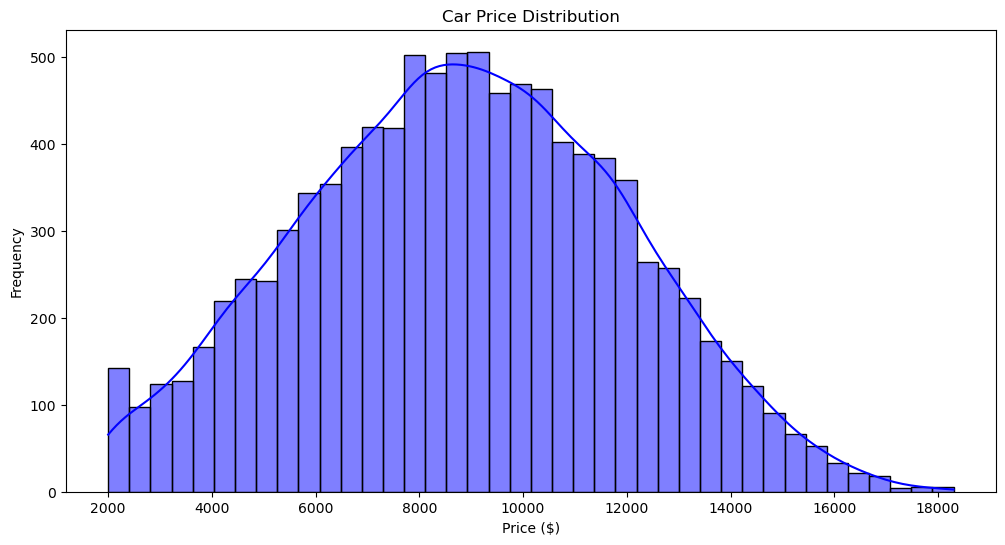

In [ ]:
# Histogram of Price Distribution
# Explanation: A histogram is chosen to visualize the distribution of car prices, allowing to see where most prices fall and if there are any outliers.
plt.figure(figsize=(12, 6))
sns.histplot(df["Price"], bins=40, kde=True, color='blue')
plt.title("Car Price Distribution")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()


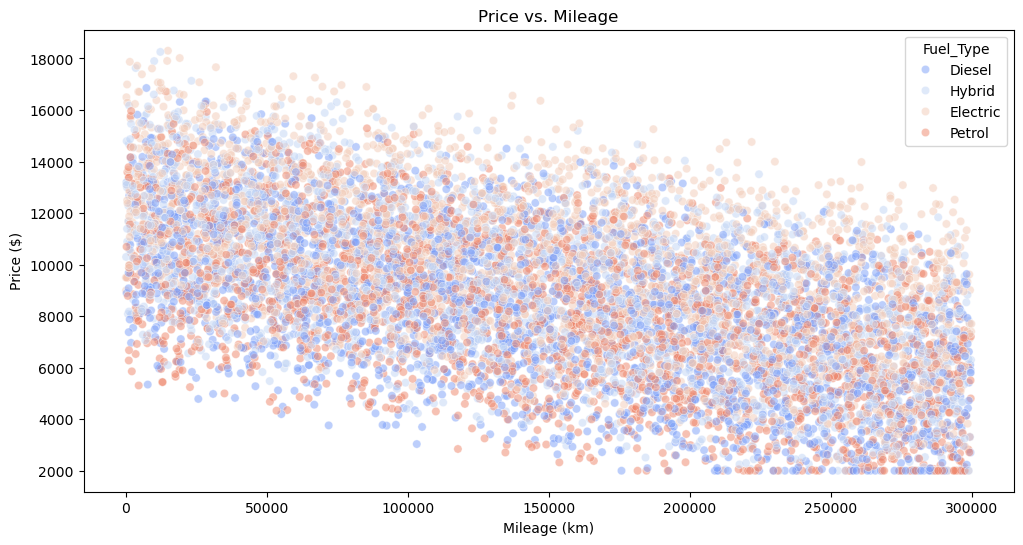

In [ ]:
# Scatter plot of Price vs. Mileage
# Explanation: A scatter plot is used to examine the relationship between mileage and price. Higher mileage typically leads to lower prices and adding fuel type as a hue helps analyze differences between fuel categories.
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df["Mileage"], y=df["Price"], alpha=0.5, hue=df["Fuel_Type"], palette='coolwarm')
plt.title("Price vs. Mileage")
plt.xlabel("Mileage (km)")
plt.ylabel("Price ($)")
plt.show()


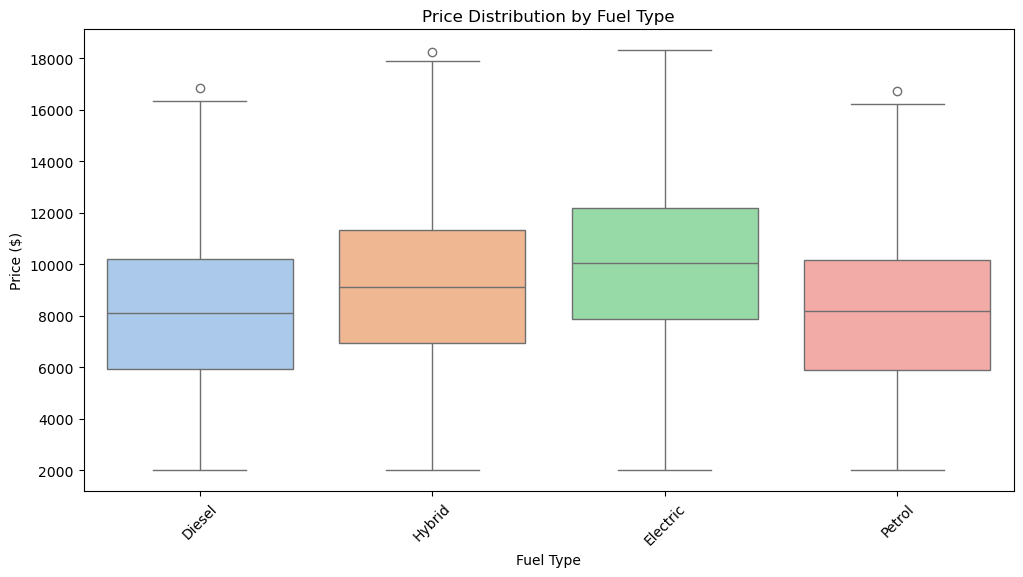

In [ ]:
# Boxplot of Price by Fuel Type
# Explanation: A boxplot is chosen to display the distribution of car prices across different fuel types. This helps identify variations in price trends among electric, gasoline and diesel cars.
plt.figure(figsize=(12, 6))
sns.boxplot(x="Fuel_Type", y="Price", data=df, hue="Fuel_Type", palette="pastel", legend=False)
plt.title("Price Distribution by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.show()

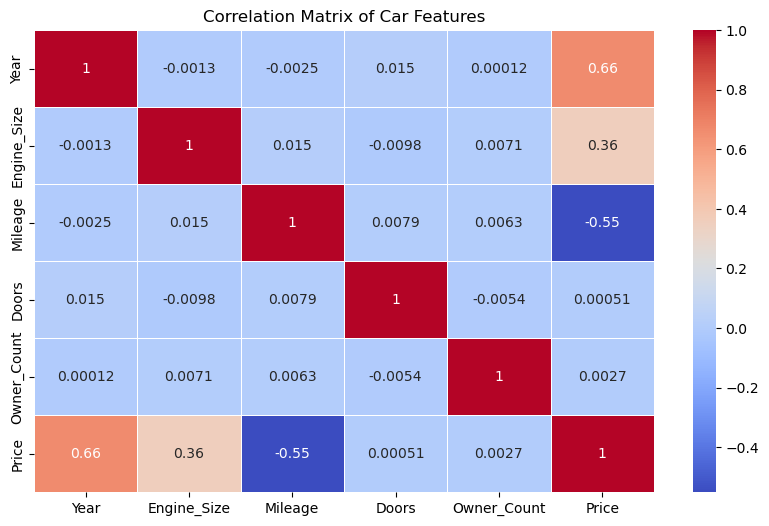

In [ ]:
# Correlation Heatmap
# Explanation: A heatmap is used to show correlations between numerical variables, helping to identify the most influential factors affecting price.
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Car Features")
plt.show()


In [ ]:
# Executive Summary
summary = """
Key Insights:
- The majority of cars are priced between $5,000 and $25,000, with a skew towards lower prices.
- There is a strong negative correlation between mileage and price, indicating that higher-mileage cars tend to be significantly cheaper.
- Fuel type affects price: Electric cars generally have higher prices, while diesel and gasoline cars are more common in the lower price range.
- Newer models tend to retain higher values, which is expected due to depreciation effects.
- Cars with fewer previous owners typically have higher resale values.

Recommendations:
1. Focus on acquiring low-mileage vehicles, as they retain value better and attract higher prices.
2. Monitor the increasing demand for electric vehicles to adapt inventory accordingly.
3. Prioritize selling newer models, as they provide better profit margins and higher customer demand.
4. Consider targeting brands and models that have historically shown strong price stability.
5. Offer detailed vehicle history reports to build trust and justify higher pricing for well-maintained cars.
"""
print(summary)


Key Insights::
- The majority of cars are priced between $5,000 and $25,000, with a skew towards lower prices.
- There is a strong negative correlation between mileage and price, indicating that higher-mileage cars tend to be significantly cheaper.
- Fuel type affects price: Electric cars generally have higher prices, while diesel and gasoline cars are more common in the lower price range.
- Newer models tend to retain higher values, which is expected due to depreciation effects.
- Cars with fewer previous owners typically have higher resale values.

Recommendations:
1. Focus on acquiring low-mileage vehicles, as they retain value better and attract higher prices.
2. Monitor the increasing demand for electric vehicles to adapt inventory accordingly.
3. Prioritize selling newer models, as they provide better profit margins and higher customer demand.
4. Consider targeting brands and models that have historically shown strong price stability.
5. Offer detailed vehicle history reports to